**Basics**

In [1]:
## Standard libraries
import os
import math
import numpy as np
import time

## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()

## Progress bar
from tqdm.notebook import tqdm

<ipython-input-1-ef889392170e>:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf') # For export


**lets import PyTorch**

In [2]:
import torch
print("Using torch", torch.__version__)

Using torch 2.6.0+cu124


# PyTorch provides functions that are stochastic like generating random numbers. However, a very good practice is to setup your code to be reproducible with the exact same random numbers. This is why we set a seed below.

# Tensors

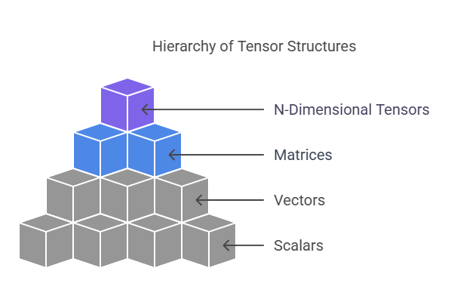

In [3]:
x = torch.Tensor(2, 3, 4)
print(x)



tensor([[[7.6129e-33, 0.0000e+00, 1.4013e-45, 0.0000e+00],
         [7.6126e-33, 0.0000e+00, 7.6126e-33, 0.0000e+00],
         [3.3631e-44, 0.0000e+00, 1.3871e-38, 0.0000e+00]],

        [[2.8026e-45, 1.2612e-44, 0.0000e+00, 0.0000e+00],
         [1.4013e-45, 0.0000e+00, 1.4013e-45, 1.4013e-45],
         [3.3631e-44,        nan, 1.8901e+34, 4.3192e-41]]])


The function ***torch.Tensor*** allocates memory for the desired tensor, but reuses any values that have already been in the memory. To directly assign values to the tensor during initialization, there are many alternatives including:

*   torch.zeros: Creates a tensor filled with zeros
*   torch.ones: Creates a tensor filled with ones
*   torch.rand: Creates a tensor with random values uniformly sampled between 0 and 1
*   torch.randn: Creates a tensor with random values sampled from a normal distribution with mean 0 and variance 1
*   torch.arange: Creates a tensor containing the values  *N,N+1,N+2,...,M *
*   torch.Tensor (input list): Creates a tensor from the list elements you provide






In [11]:
x = torch.zeros(2, 3, 4)
print(x)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])


In [13]:
# tensor from a (nested) list
x = torch.Tensor([[1, 2], [3, 4]])
print(x)
x = torch.Tensor([[[1, 2], [3, 4]],[[5, 6], [7, 8]]])
print(x)

tensor([[1., 2.],
        [3., 4.]])
tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])


In [5]:
# tensor with random values between 0 and 1 with the shape [2, 3, 4]
x = torch.rand(2, 3, 4)
print(x)

tensor([[[0.3817, 0.7252, 0.8432, 0.6479],
         [0.4407, 0.3584, 0.3658, 0.6460],
         [0.0549, 0.1305, 0.8533, 0.3083]],

        [[0.4009, 0.5490, 0.8912, 0.7488],
         [0.0650, 0.9710, 0.2319, 0.1882],
         [0.0490, 0.0219, 0.5612, 0.0932]]])


In [6]:
shape = x.shape
print("Shape:", x.shape)

size = x.size()
print("Size:", size)

dim1, dim2, dim3 = x.size()
print("Size:", dim1, dim2, dim3)

Shape: torch.Size([2, 3, 4])
Size: torch.Size([2, 3, 4])
Size: 2 3 4


# Tensor to Numpy and Vice Versa ==> numpy array to tensor via function *torch.from_numpy *

In [7]:
np_arr = np.array([[1, 2], [3, 4]])
tensor = torch.from_numpy(np_arr)

print("Numpy array:", np_arr)
print("PyTorch tensor:", tensor)

Numpy array: [[1 2]
 [3 4]]
PyTorch tensor: tensor([[1, 2],
        [3, 4]])


#  PyTorch tensor back to a numpy array ==> *use the function .numpy() on tensors*

In [8]:
tensor = torch.arange(4)
np_arr = tensor.numpy()

print("PyTorch tensor:", tensor)
print("Numpy array:", np_arr)

PyTorch tensor: tensor([0, 1, 2, 3])
Numpy array: [0 1 2 3]


# Operations

In [9]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
y = x1 + x2

print("X1", x1)
print("X2", x2)
print("Y", y)

X1 tensor([[0.5002, 0.3189, 0.5037],
        [0.4583, 0.7969, 0.8933]])
X2 tensor([[0.0298, 0.2732, 0.9150],
        [0.6565, 0.7160, 0.9155]])
Y tensor([[0.5300, 0.5921, 1.4187],
        [1.1148, 1.5128, 1.8089]])


In [10]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
print("X1 (before)", x1)
print("X2 (before)", x2)

x2.add_(x1)
print("X1 (after)", x1)
print("X2 (after)", x2)

X1 (before) tensor([[0.0582, 0.2258, 0.5140],
        [0.1521, 0.4100, 0.9380]])
X2 (before) tensor([[0.0723, 0.1703, 0.6225],
        [0.5017, 0.2095, 0.5759]])
X1 (after) tensor([[0.0582, 0.2258, 0.5140],
        [0.1521, 0.4100, 0.9380]])
X2 (after) tensor([[0.1305, 0.3961, 1.1365],
        [0.6538, 0.6195, 1.5139]])
